# Exploratory Data Analysis - Terrorism (Phase 1 Task)

CVIP (CodersCave)

Normal Task : Exploratory Data Analysis - Terrorism

Name - Aryan Dutta

DATASET : Kaggle


Conducted an in-depth Exploratory Data Analysis (EDA) on a Comprehensive Global Terrorism Dataset sourced from Kaggle.


-Explored the dataset to identify patterns, trends, and key factors influencing terrorism incidents worldwide and using charts & graphs to present the results effectively.

In [198]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [199]:
#load the dataset
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [200]:
data.shape

(36806, 135)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36806 entries, 0 to 36805
Columns: 135 entries, eventid to related
dtypes: float64(57), int64(21), object(57)
memory usage: 37.9+ MB


In [202]:
#select the columns we will use in this analysis
data_col = data[['eventid', 'iyear','success','imonth', 'iday', 'country_txt','region_txt','suicide', 'attacktype1_txt', 'targtype1_txt', 'target1','nkill']]

In [203]:
data_col.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
0,197000000001,1970,1,7,2,Dominican Republic,Central America & Caribbean,0,Assassination,Private Citizens & Property,Julio Guzman,1.0
1,197000000002,1970,1,0,0,Mexico,North America,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0
2,197001000001,1970,1,1,0,Philippines,Southeast Asia,0,Assassination,Journalists & Media,Employee,1.0
3,197001000002,1970,1,1,0,Greece,Western Europe,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN
4,197001000003,1970,1,1,0,Japan,East Asia,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN


In [204]:
data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36806 entries, 0 to 36805
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventid          36806 non-null  int64  
 1   iyear            36806 non-null  int64  
 2   success          36806 non-null  int64  
 3   imonth           36806 non-null  int64  
 4   iday             36806 non-null  int64  
 5   country_txt      36806 non-null  object 
 6   region_txt       36806 non-null  object 
 7   suicide          36806 non-null  int64  
 8   attacktype1_txt  36806 non-null  object 
 9   targtype1_txt    36806 non-null  object 
 10  target1          36432 non-null  object 
 11  nkill            31156 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 3.4+ MB


In [205]:
data_col.isna().sum()

eventid               0
iyear                 0
success               0
imonth                0
iday                  0
country_txt           0
region_txt            0
suicide               0
attacktype1_txt       0
targtype1_txt         0
target1             374
nkill              5650
dtype: int64

Here we have some missing values in target1 and nkill. Replace the null values for target1 with the word 'Unknown.

In [206]:
data_col['target1']=data_col['target1'].fillna('unknown')

In [207]:
data_col['nkill']=data_col['nkill'].fillna(0.0)

In [208]:
data_col.isna().sum()

eventid            0
iyear              0
success            0
imonth             0
iday               0
country_txt        0
region_txt         0
suicide            0
attacktype1_txt    0
targtype1_txt      0
target1            0
nkill              0
dtype: int64

## Analysing Terrorist Attacks Globally Across the World

In [209]:
# trends over the years for the world

yearly_attacks = data_col.groupby('iyear').size().reset_index(name='count')

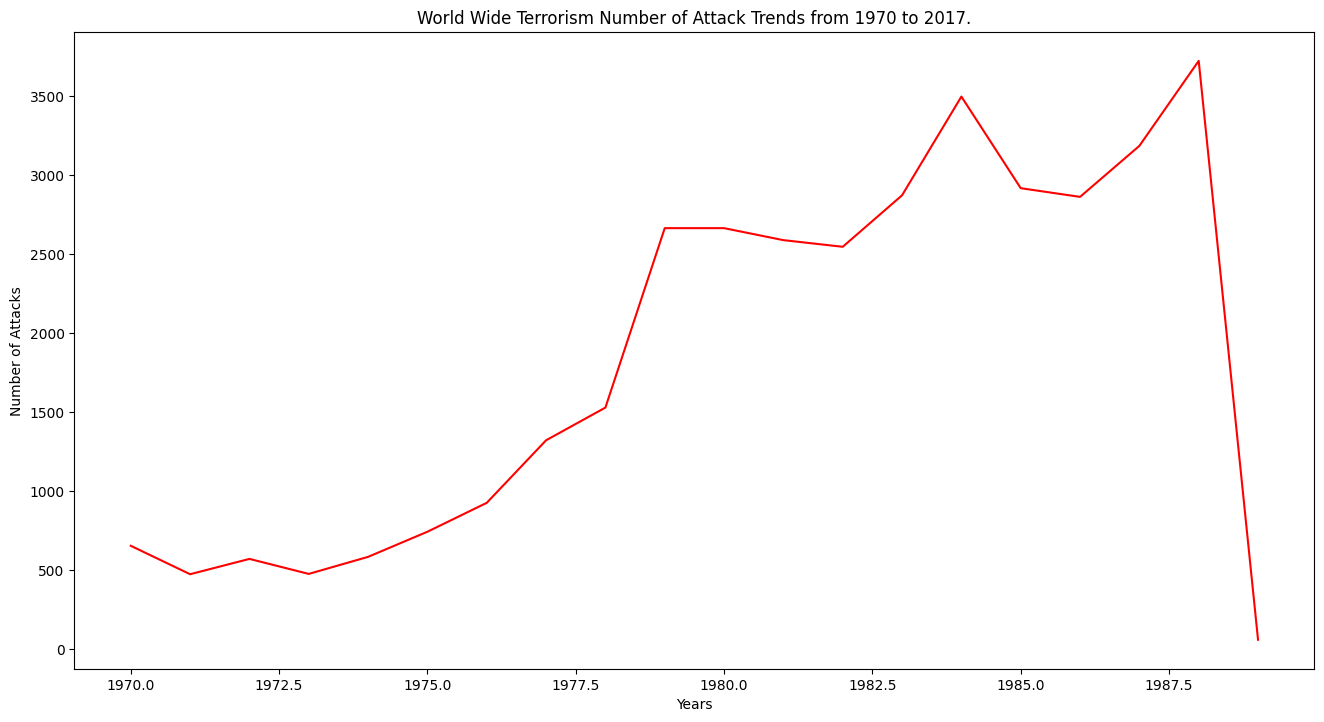

In [210]:
sns.lineplot(x='iyear', y='count', data=yearly_attacks, color= "red")
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.title('World Wide Terrorism Number of Attack Trends from 1970 to 2017.')
plt.show()

In [211]:
# Terrorist Attack trends based on the region

yearly_attacks_region = data_col.groupby(['iyear', 'region_txt']).size().reset_index(name='count')


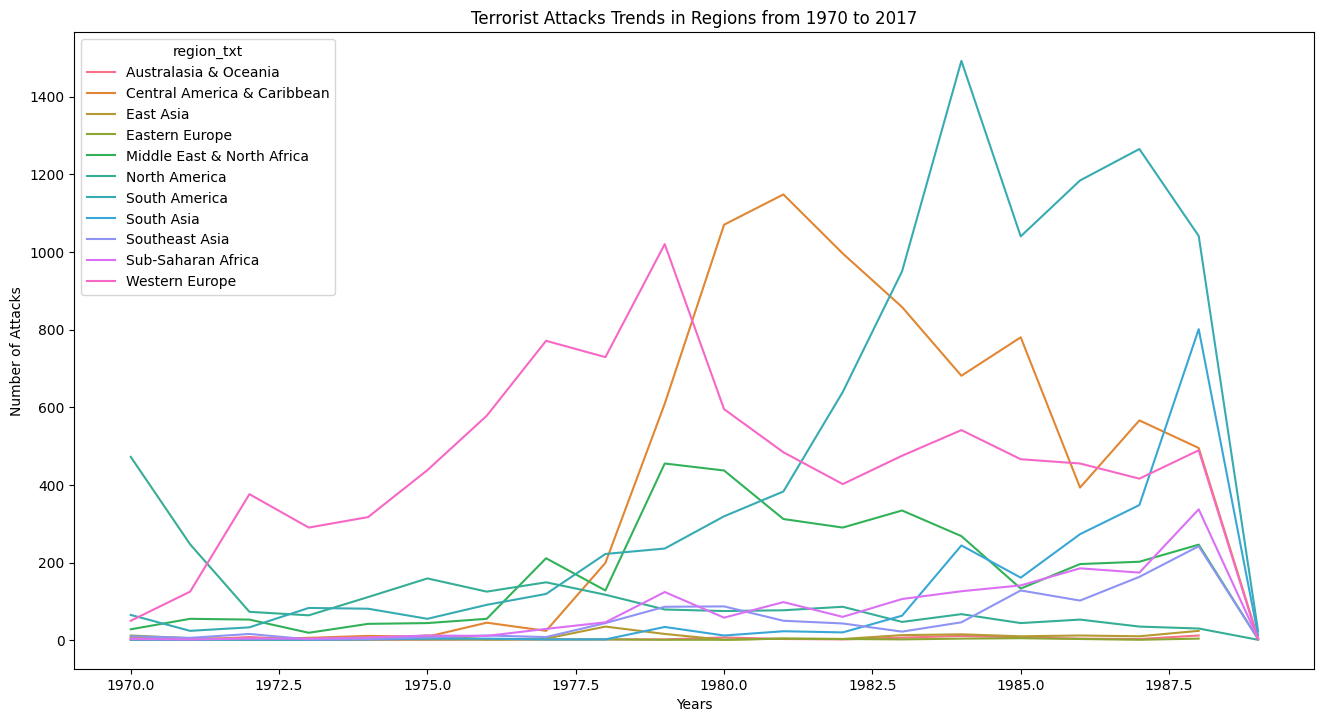

In [212]:
sns.lineplot(x='iyear', y='count',hue='region_txt', data=yearly_attacks_region )
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

Text(0.5, 1.0, ' Top 30 Country w.r.t numbers of Attacks')

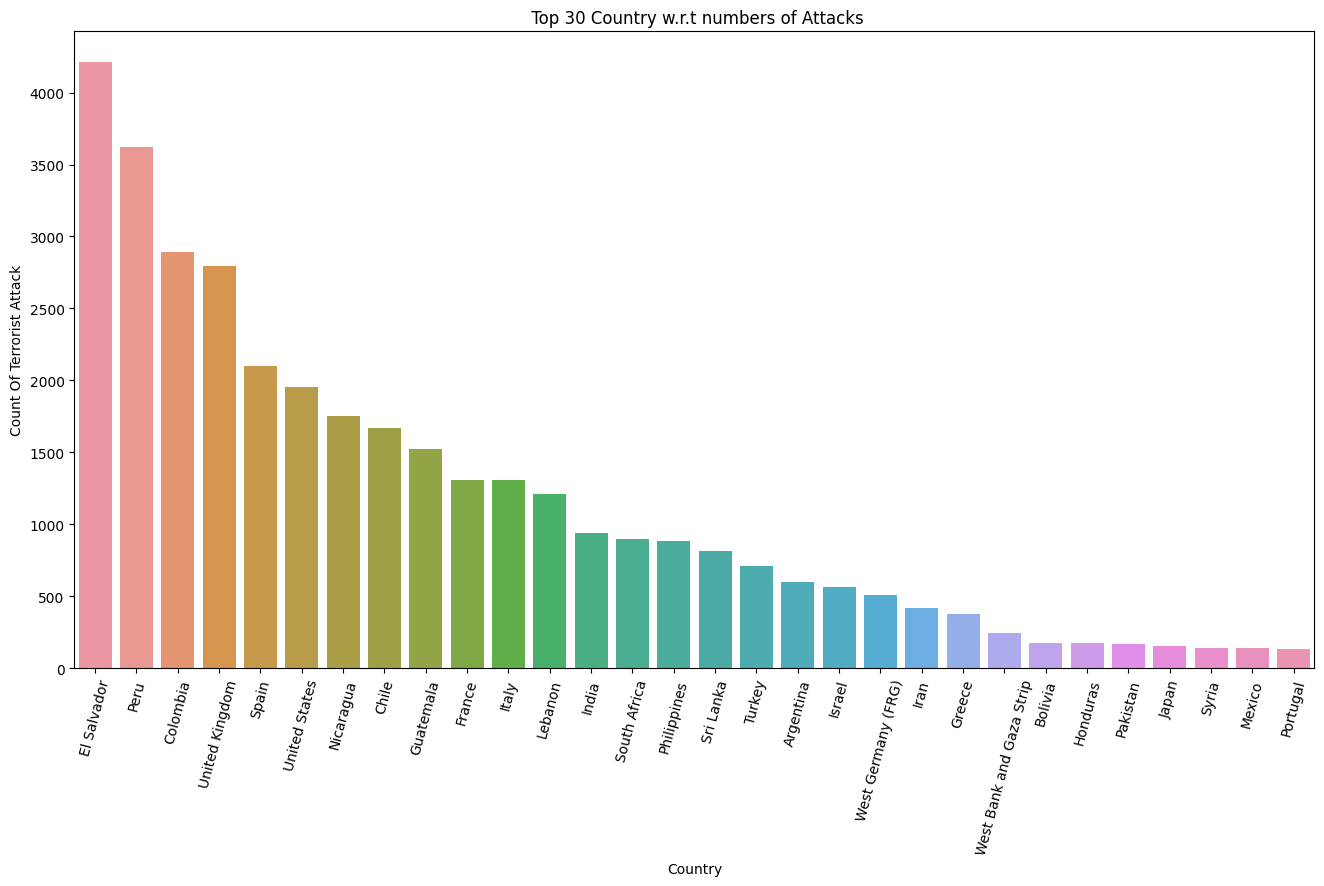

In [213]:
ax=sns.countplot(x='country_txt',data=data,order=data['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country')
plt.xticks(rotation=75)
ax.set_ylabel('Count Of Terrorist Attack')
ax.set_title(' Top 30 Country w.r.t numbers of Attacks')

In [214]:
yearly_attacks_region

,iyear,region_txt,count
0,1970,Australasia & Oceania,1
1,1970,Central America & Caribbean,7
2,1970,East Asia,2
3,1970,Eastern Europe,12
4,1970,Middle East & North Africa,28
...,...,...,...
204,1989,South America,24
205,1989,South Asia,13
206,1989,Southeast Asia,3
207,1989,Sub-Saharan Africa,5


Text(0.5, 1.0, 'Region w.r.t numbers of attacks')

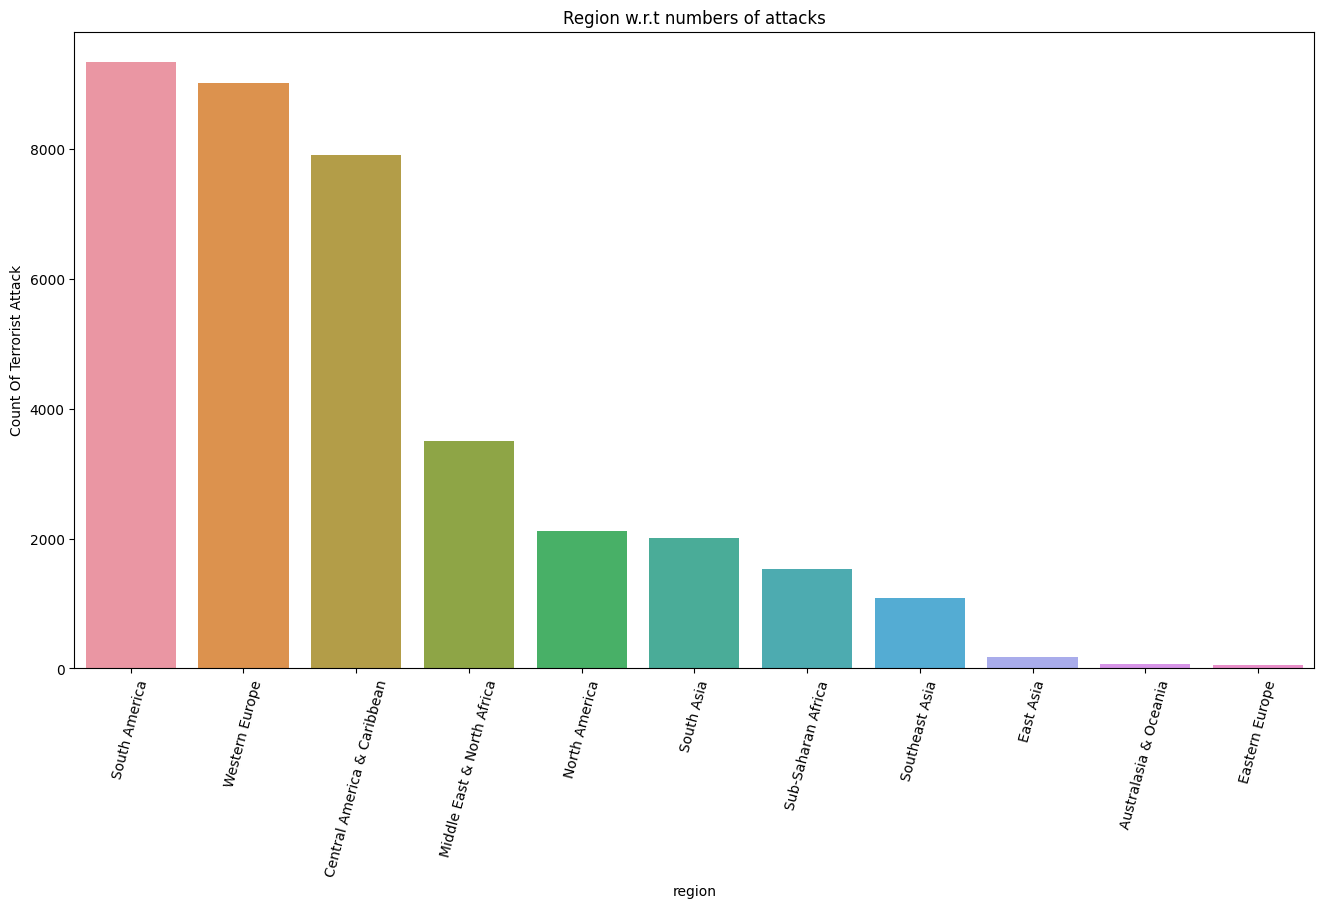

In [215]:
ax=sns.countplot(x='region_txt',data=data,order=data['region_txt'].value_counts().index)
ax.set_xlabel('region')
plt.xticks(rotation=75)
ax.set_ylabel('Count Of Terrorist Attack')
ax.set_title('Region w.r.t numbers of attacks')

In [216]:
# Countries with the most terrorist attacks

country_attacks = data_col.groupby('country_txt').size().reset_index(name='count').sort_values(by='count', ascending = False)
top5_country = country_attacks.head(5)

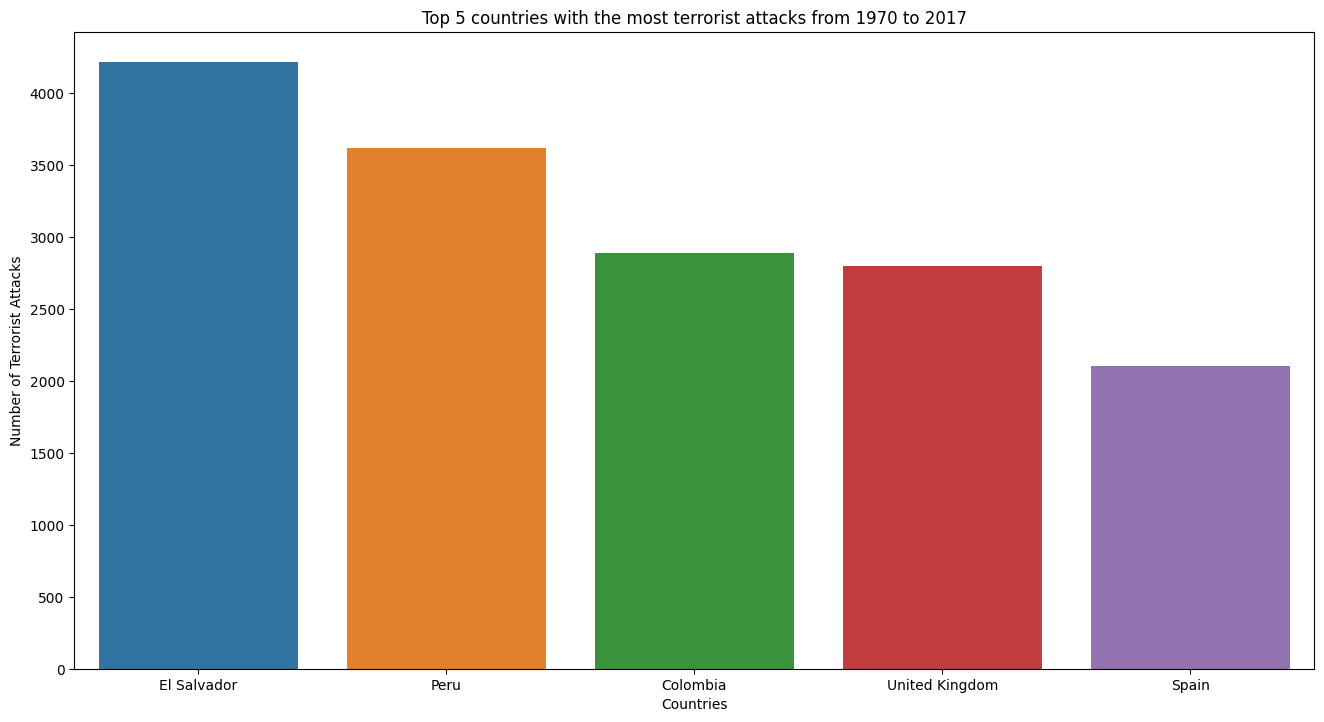

In [217]:
sns.barplot(x='country_txt', y='count', data=top5_country)
plt.title('Top 5 countries with the most terrorist attacks from 1970 to 2017')
plt.xlabel('Countries')
plt.ylabel('Number of Terrorist Attacks')
plt.show()

In [218]:
# success of the terrorist attacks over the years
total_count = data_col['success'].count()
success = data_col.groupby('success').size().reset_index(name="count")
success['percentage'] = (success['count'] / total_count) * 100
success

,success,count,percentage
0,0,2955,8.028582
1,1,33851,91.971418


Text(0.5, 1.0, 'Success rate of Terrorist attacks from 2012 to 2017')

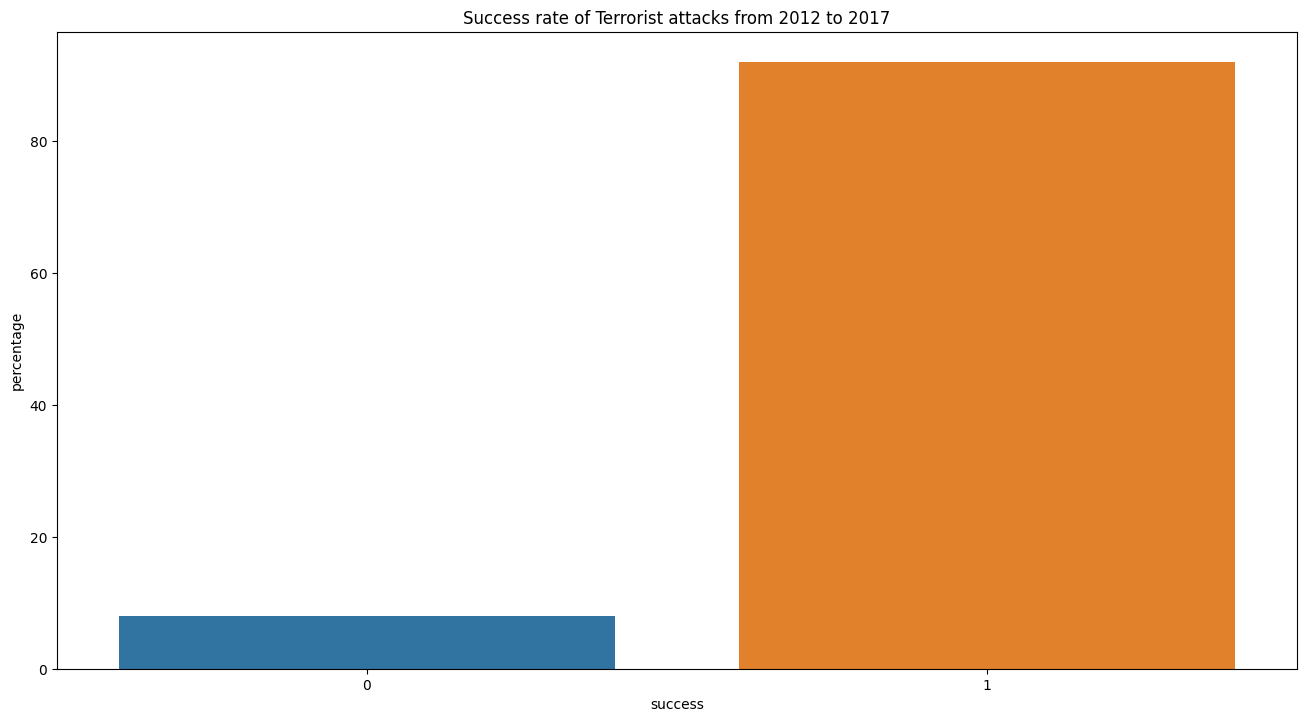

In [219]:
sns.barplot(x='success', y= 'percentage',data = success)
plt.title('Success rate of Terrorist attacks from 2012 to 2017')

Text(0.5, 1.0, 'Most frequently used weapons in attack')

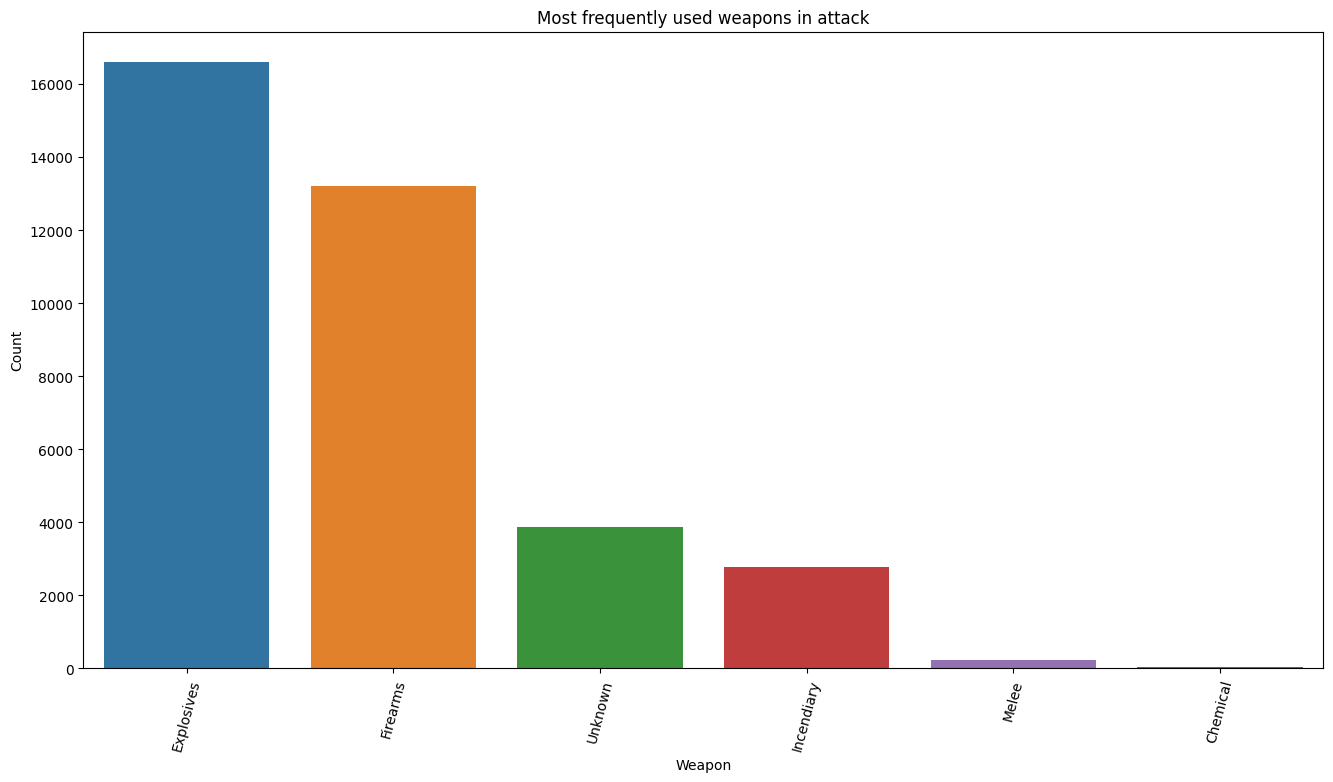

In [220]:
ax=sns.countplot(x='weaptype1_txt',data=data,order=data['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon')
plt.xticks(rotation=75)
ax.set_ylabel('Count')
ax.set_title('Most frequently used weapons in attack')

In [221]:
attack_type = data_col.groupby(['attacktype1_txt', 'success']).size().reset_index(name="count")
attack_type

,attacktype1_txt,success,count
0,Armed Assault,0,144
1,Armed Assault,1,7877
2,Assassination,0,990
3,Assassination,1,5217
4,Bombing/Explosion,0,1464
5,Bombing/Explosion,1,15210
6,Facility/Infrastructure Attack,0,183
7,Facility/Infrastructure Attack,1,2236
8,Hijacking,0,14
9,Hijacking,1,146


Text(0, 0.5, 'Number of Attacks')

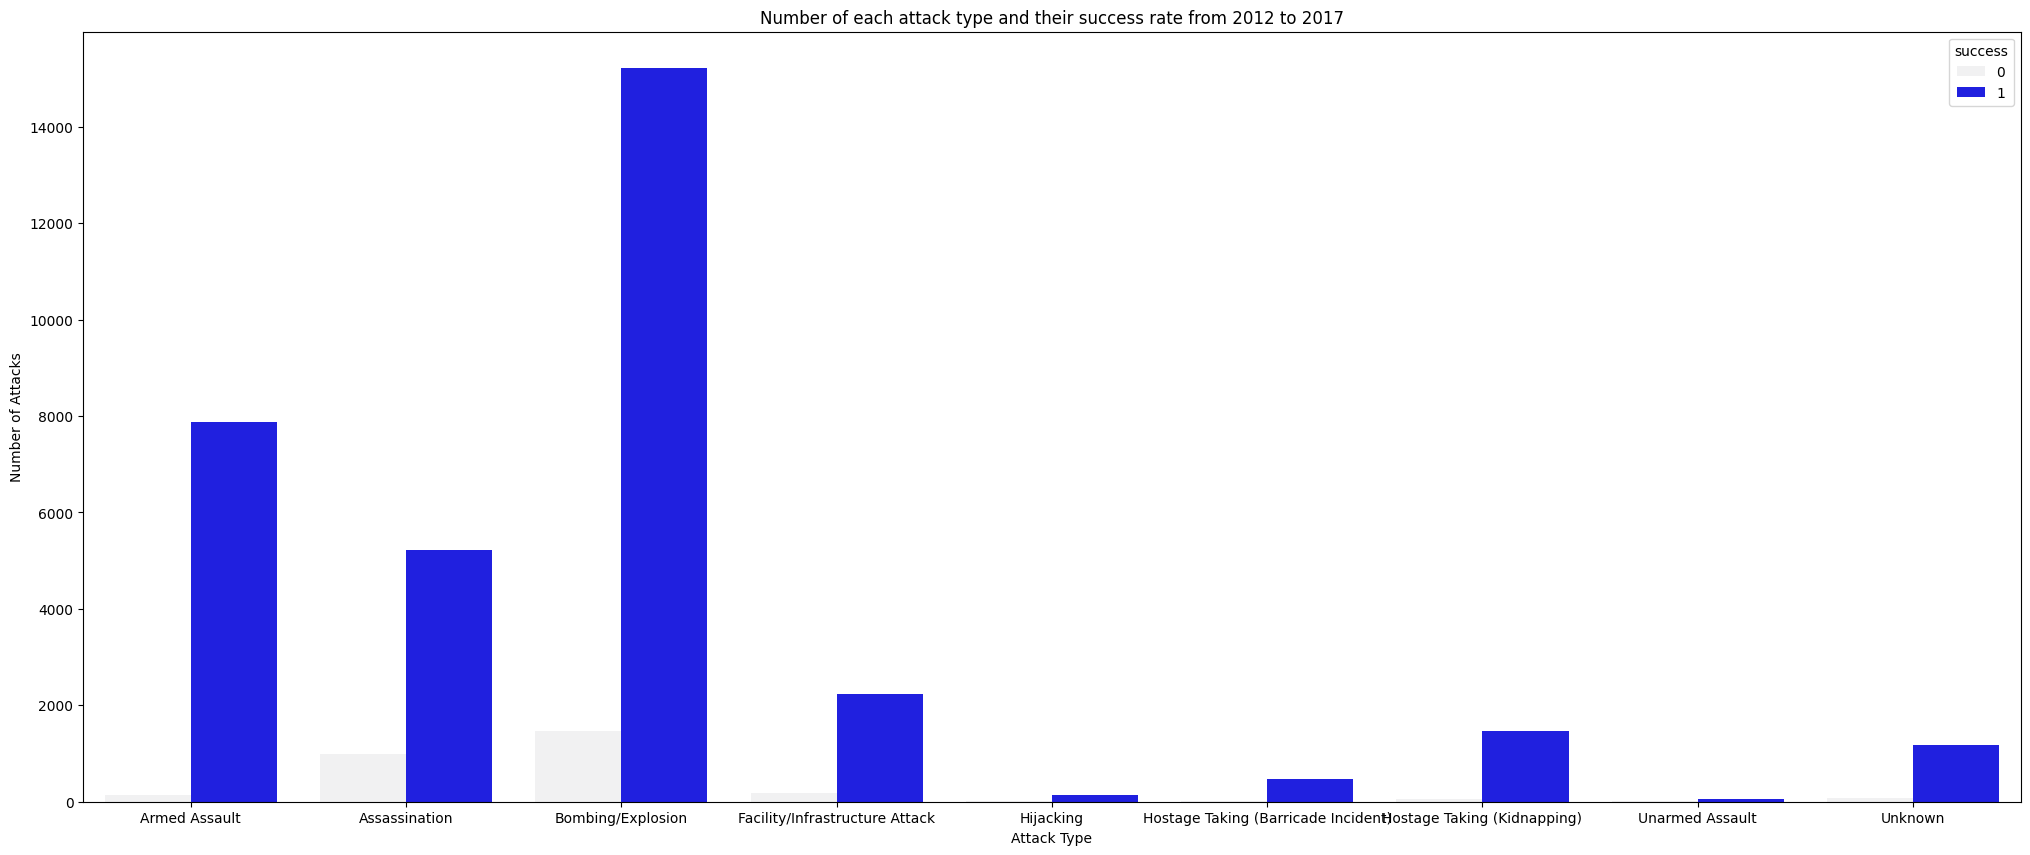

In [222]:
plt.figure(figsize=(25,10))
plt.title('Number of each attack type and their success rate from 2012 to 2017')
sns.barplot(x='attacktype1_txt', y='count', hue='success', data=attack_type, color= "blue")
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')

In [223]:
# Casualties due to Terrorist Attacks around the world

nkills_attack = data_col.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
nkills_attack

,attacktype1_txt,nkill
0,Armed Assault,37540.0
1,Assassination,7696.0
2,Bombing/Explosion,14821.0
3,Facility/Infrastructure Attack,1132.0
4,Hijacking,409.0
5,Hostage Taking (Barricade Incident),474.0
6,Hostage Taking (Kidnapping),793.0
7,Unarmed Assault,49.0
8,Unknown,4480.0


Text(0.5, 1.0, 'Frequent targets of terrorists')

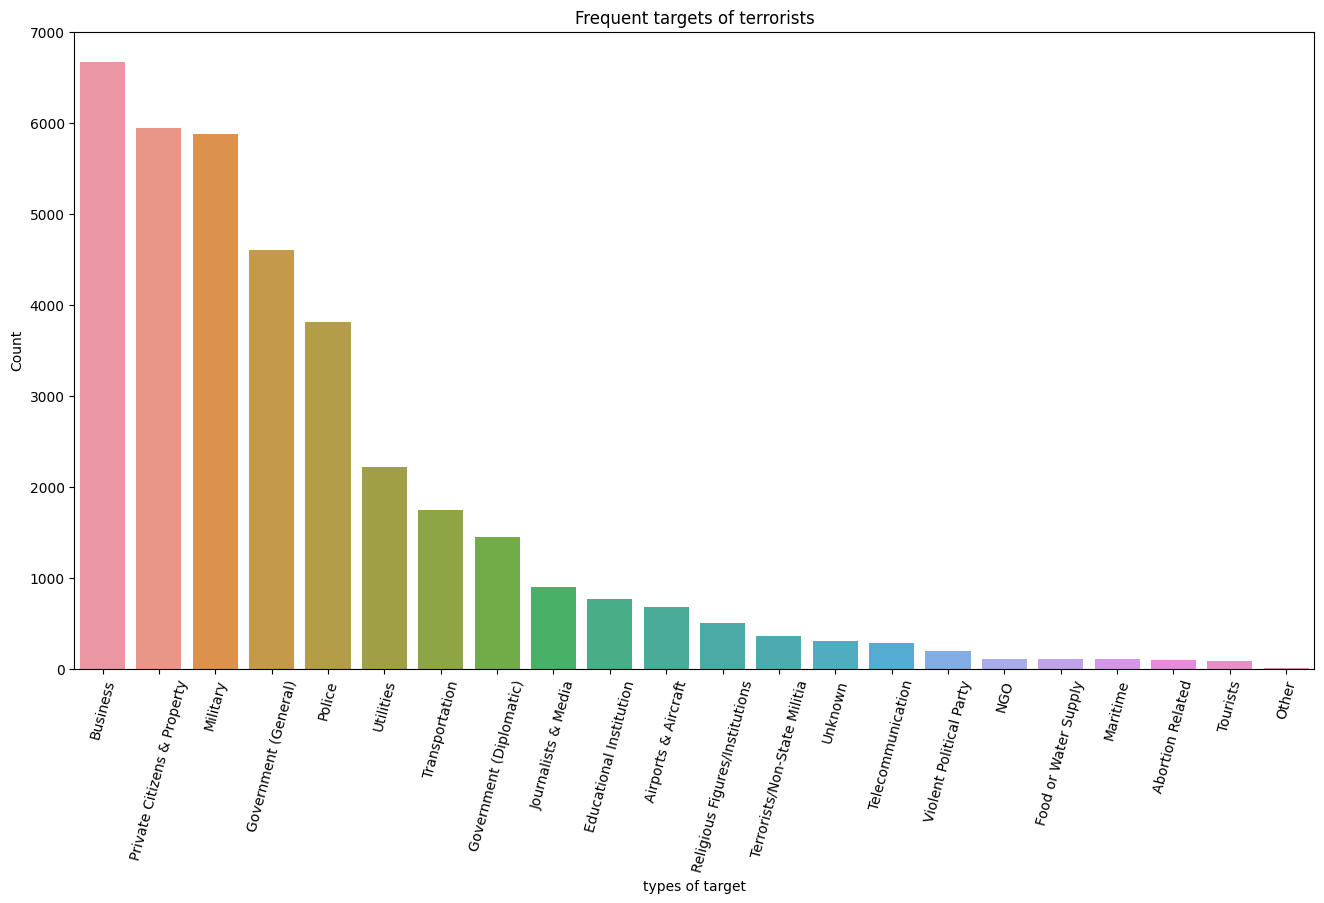

In [224]:
ax=sns.countplot(x='targtype1_txt',data=data,order=data['targtype1_txt'].value_counts().index)
ax.set_xlabel('types of target')
plt.xticks(rotation=75)
ax.set_ylabel('Count')
ax.set_title('Frequent targets of terrorists')

Text(0.5, 1.0, 'numbers of attacks')

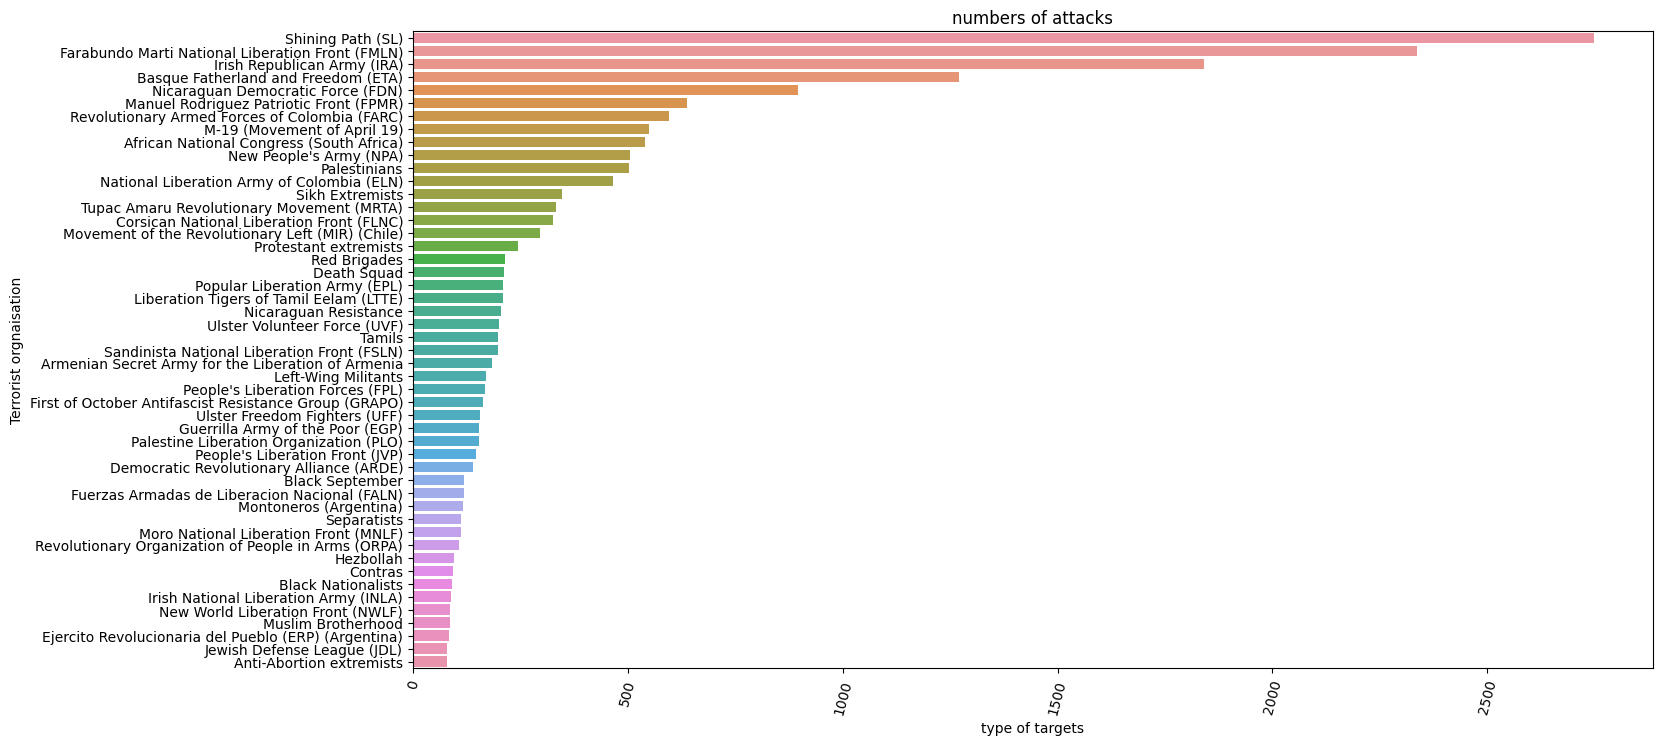

In [225]:
ax=sns.countplot(y='gname',data=data,order=data['gname'].value_counts().index[1:50])
ax.set_xlabel('type of targets')
plt.xticks(rotation=75)
ax.set_ylabel('Terrorist orgnaisation')
ax.set_title('numbers of attacks')

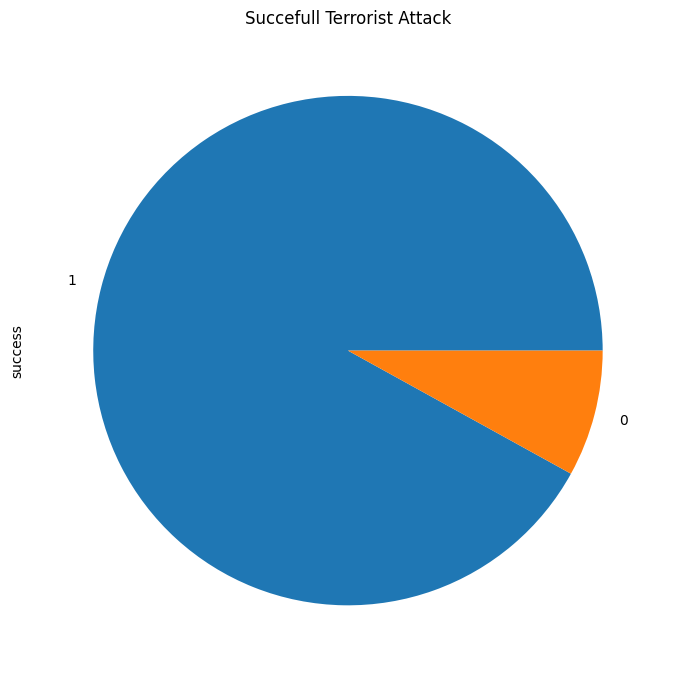

In [226]:
ax=data['success'].value_counts().plot(kind='pie')
ax.set_title('Succefull Terrorist Attack');

## Analysing Terrorist Attacks in India

In [227]:
mycountries = data_col[(data_col['country_txt'] == 'India')]
mycountries.head()

,eventid,iyear,success,imonth,iday,country_txt,region_txt,suicide,attacktype1_txt,targtype1_txt,target1,nkill
1186,197202220004,1972,1,2,22,India,South Asia,0,Hijacking,Airports & Aircraft,B-747,0.0
2764,197501190004,1975,1,1,2,India,South Asia,0,Bombing/Explosion,Government (General),Lalit Narayan Mishra and a legislator,4.0
3857,197605260001,1976,1,5,26,India,South Asia,0,Bombing/Explosion,Airports & Aircraft,New Delhi airport,0.0
5327,197709280004,1977,1,9,28,India,South Asia,0,Hijacking,Airports & Aircraft,DC-8,0.0
7337,197901130004,1979,1,1,13,India,South Asia,0,Armed Assault,Police,patrol,0.0


In [228]:
# Terrorist Attacks in India
india = data_col[(data_col['country_txt'] =='India')]
num_ofattacks = india.groupby('iyear').size().reset_index(name="count")
num_ofattacks

,iyear,count
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20
5,1980,10
6,1981,16
7,1982,13
8,1983,47
9,1984,159


In [229]:
india_sumattacks = num_ofattacks['count'].sum()
india_sumattacks
print('Total Number of attacks in India is', india_sumattacks)

Total Number of attacks in India is 938


<Axes: title={'center': 'Yearly Trend of Terrorist Attcks in India from 1974 to 2017'}, xlabel='Year', ylabel='Number of Attacks'>

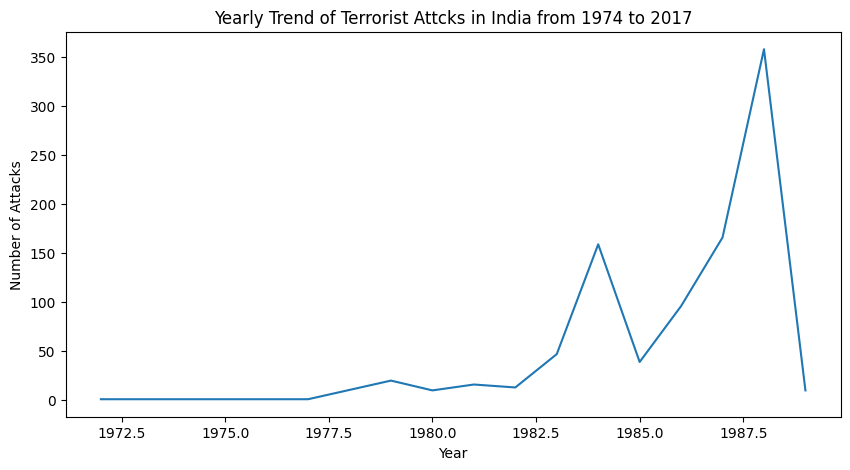

In [230]:
plt.figure(figsize=(10,5))
plt.title("Yearly Trend of Terrorist Attcks in India from 1974 to 2017")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
sns.lineplot(x="iyear", y="count", data=num_ofattacks)

Text(0.5, 0, 'Outcome')

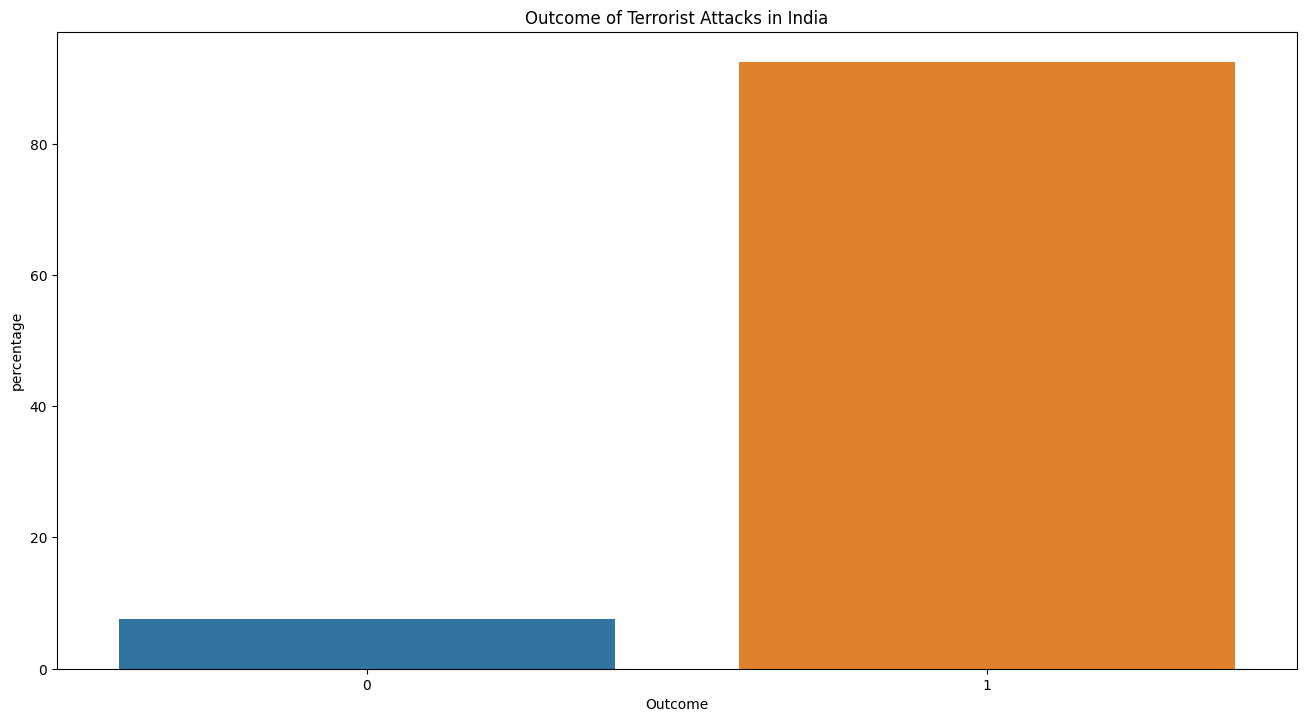

In [231]:
# success rate of the attacks over the years

succ_india = india.groupby(['success']).size().reset_index(name='count')
succ_india['percentage'] = succ_india['count']/ india_sumattacks *100

sns.barplot(x = 'success', y = 'percentage', data=succ_india)
plt.title("Outcome of Terrorist Attacks in India")
plt.xlabel("Outcome")

Text(0.5, 0, 'Attack Type')

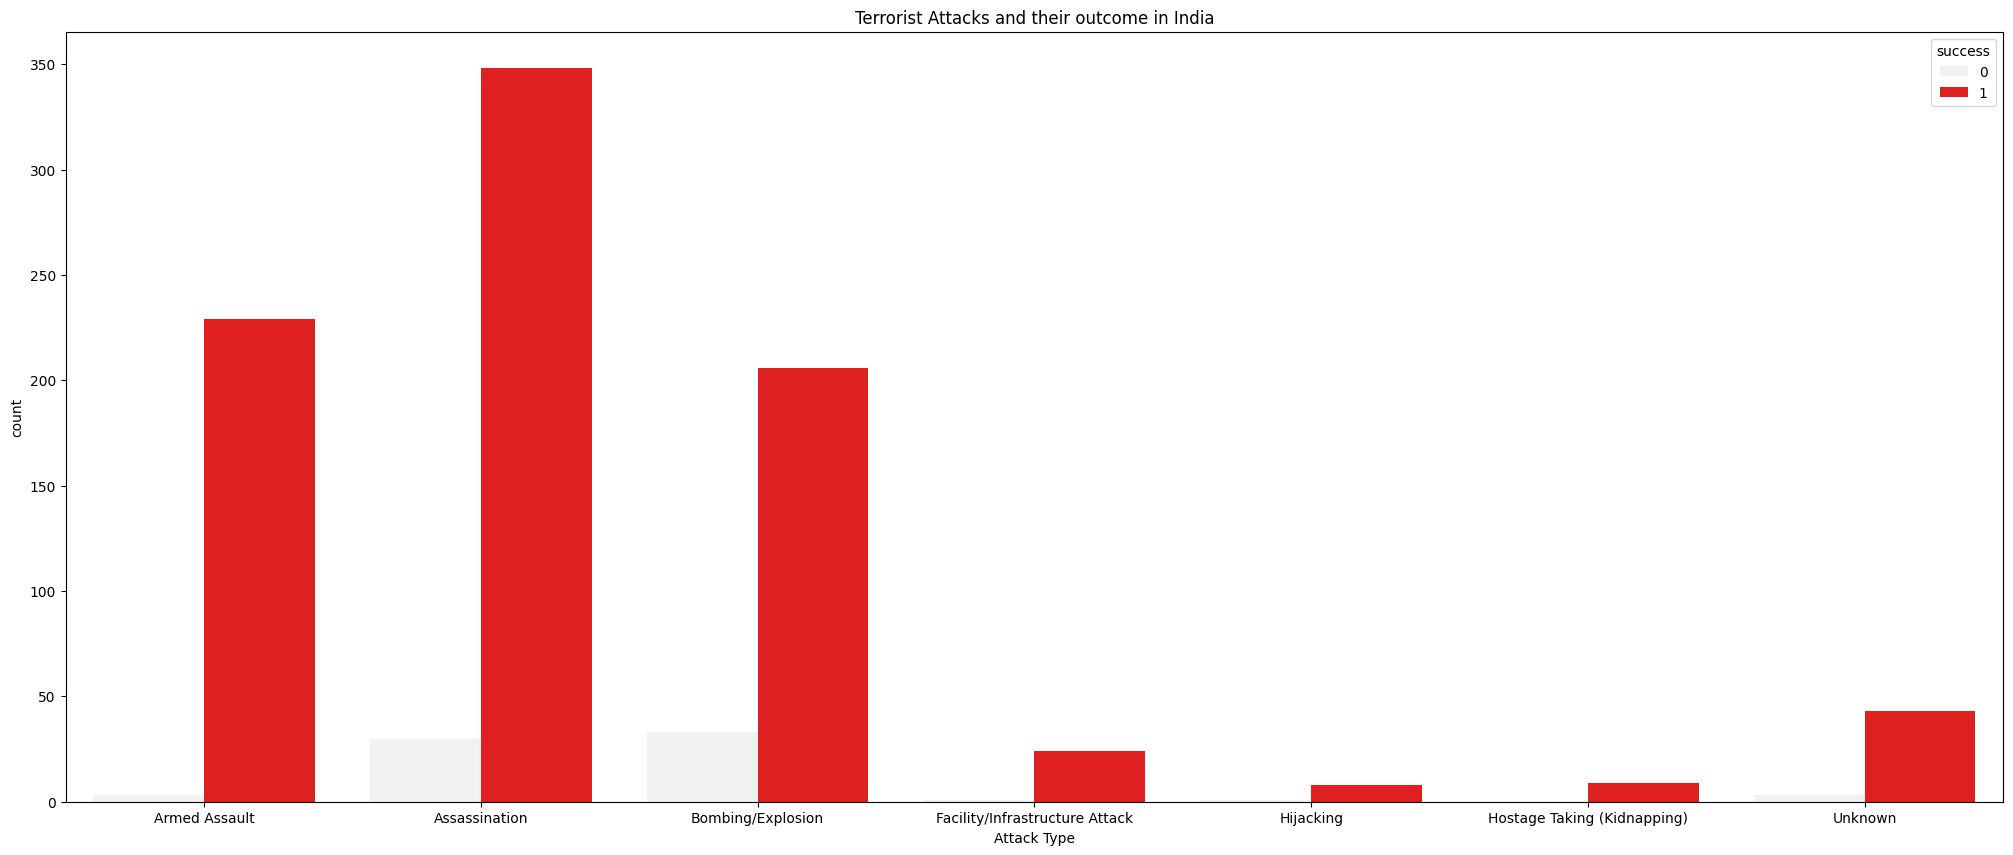

In [232]:
# Terrorist Attack Types in India

india_atype= india.groupby(['attacktype1_txt','success']).size().reset_index(name='count')
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='count', hue= 'success', data=india_atype, color="red")
plt.title("Terrorist Attacks and their outcome in India")
plt.xlabel("Attack Type")

Text(0.5, 0, 'Attack type')

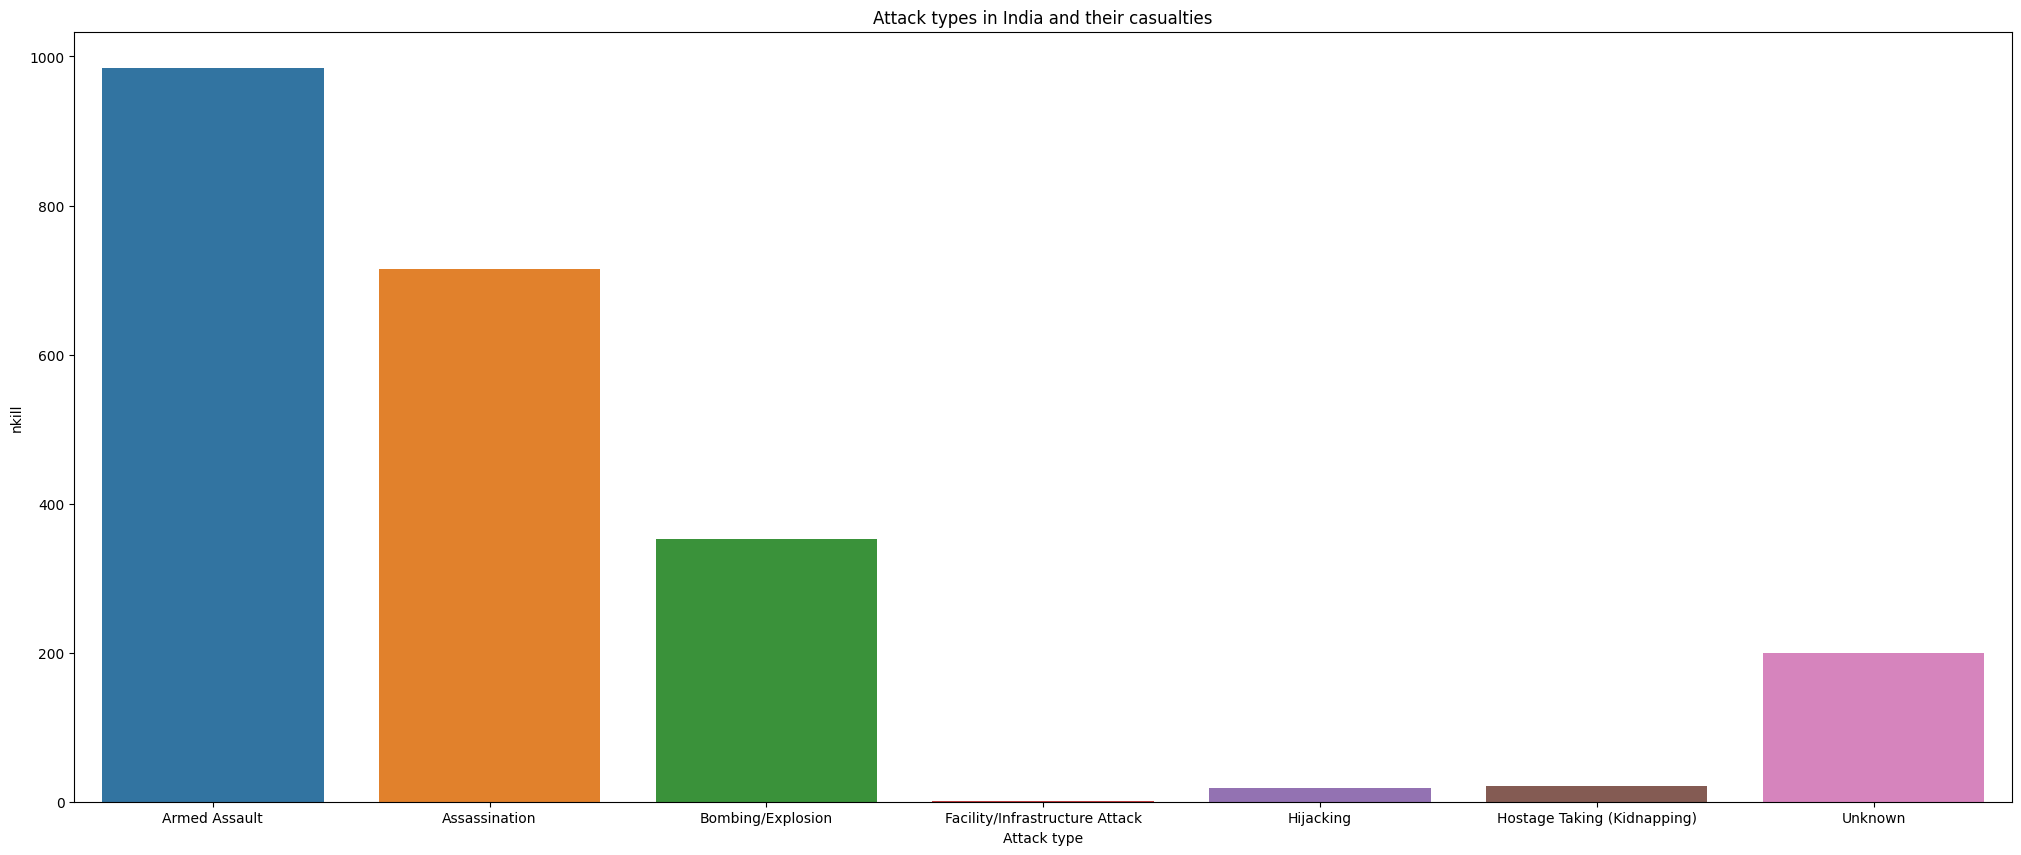

In [233]:
# Attacks Types in India and Casualties

nkillattack_india = india.groupby('attacktype1_txt')[['nkill']].sum().reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x='attacktype1_txt', y='nkill', data=nkillattack_india)
plt.title("Attack types in India and their casualties")
plt.xlabel("Attack type")

## Conclusion

Terrorism Attacks have increasingly become a problem globally and number of terrorist attacks in the Middle East and North Africa and South America increased significantly.
89% of attacks have been successful, with armed asssault being the most used terrorist attacks and armed assault and bombing / explosion causing the most casualties .
Result of analysis:
1.Most of the attacks were through either Bombing or Explosion.
2.Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
3.The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.